---
---
Bubble sort 1000   -   0.068c
Quick sort 1000   -   0.002c
Insertion sort 1000   -  0.03c
Shaker sort 1000   -   0.079c
---
---
Bubble sort 2000   -   0.302c
Quick sort 2000   -   0.004c
Insertion sort 2000   -  0.126c
Shaker sort 2000   -   0.331c
---
---
Bubble sort 3000   -   0.698c
Quick sort 3000   -   0.006c
Insertion sort 3000   -  0.285c
Shaker sort 3000   -   0.742c
---
---
Bubble sort 4000   -   1.253c
Quick sort 4000   -   0.008c
Insertion sort 4000   -  0.516c
Shaker sort 4000   -   1.341c
---
---
Bubble sort 5000   -   1.961c
Quick sort 5000   -   0.011c
Insertion sort 5000   -  0.787c
Shaker sort 5000   -   2.061c


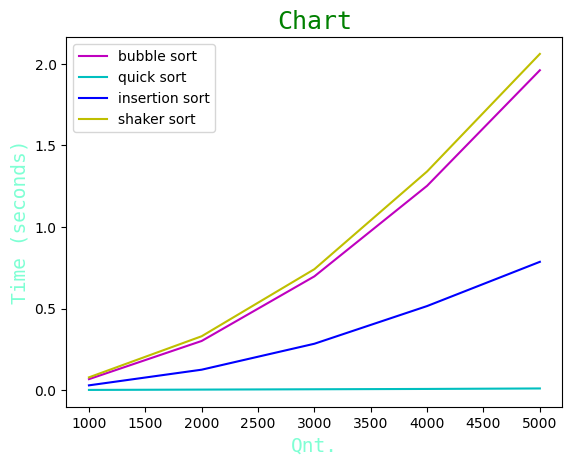

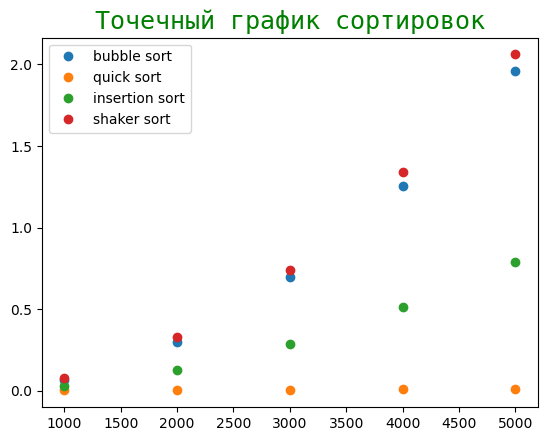

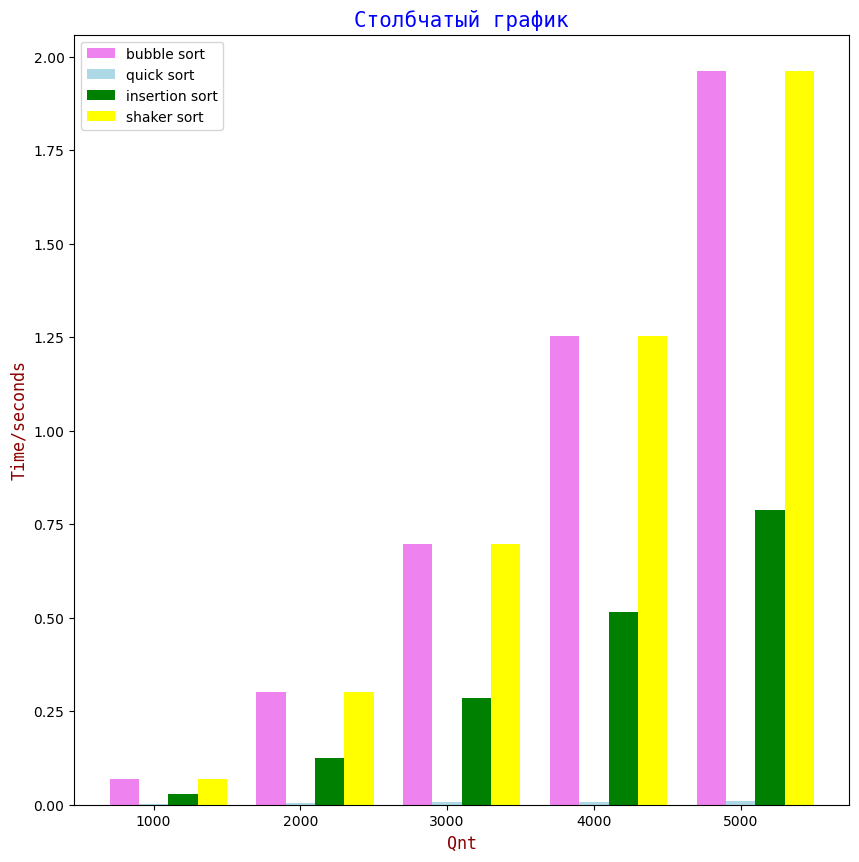

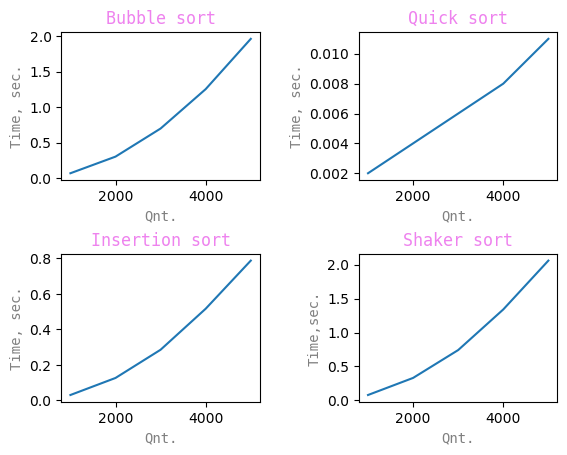

In [2]:
import random
import datetime
#import prettytable                  # пакет для таблицы
import matplotlib.pyplot as plt     # библиотека для графика

def BubbleSort(A):                  # сортировка пузырьком
    for i in range(len(A)):
        for j in range(len(A)-1-i):
            if A[j] > A[j+1]:
                a = A[j]
                A[j] = A[j+1]
                A[j+1] = a


def QuickSort(A, fst, lst):         # быстрая сортировка
    if fst >= lst:
        return

    #i, j = fst, lst
    pivot = A[fst]
    # pivot = A[random.randint(fst, lst)]
    first_bigger = fst+1
    while first_bigger <= lst:
        if A[first_bigger] >= pivot:
            break
        first_bigger += 1
    i = first_bigger+1
    while i <= lst:
        if A[i] < pivot:
            A[i], A[first_bigger] = A[first_bigger], A[i]
            first_bigger += 1
        i += 1

    last_smaller = first_bigger-1
    A[fst], A[last_smaller] = A[last_smaller], A[fst]
    QuickSort(A, fst, last_smaller-1)
    QuickSort(A, first_bigger, lst)

def InsertSort(A):  # сортировка вставки
    for i in range(1, len(A)):
        t = A[i]
        j = i - 1
        while j >= 0 and t < A[j]:
            A[j + 1] = A[j]
            j -= 1
        A[j + 1] = t

def ShakerSort(A):  # шейкерная сортировка
    N = len(A)
    for i in range(N // 2):
        for j in range(i, N - 1 - i):
            if A[j] > A[j + 1]:
                A[j], A[j + 1] = A[j + 1], A[j]
        for j in range(N - 2 - i, i, -1):
            if A[j] < A[j - 1]:
                A[j], A[j - 1] = A[j - 1], A[j]


# table = prettytable.PrettyTable(["Размер списка", "Время пузырька", "Время быстрой"])
x=[]
y1=[]#Пузырьковая сортировка
y2=[]#Быстрая сортировка
y3=[]#Сортировка вставки
y4=[]#Шейкерная сортировка


for N in range(1000,5001,1000):
    x.append(N)
    min=1
    max=N
    A=[]
    for i in range (N):
        A.append(int(round(random.random()*(max-min)+min)))

    #print(A)

    B = A.copy()
    # print(B)

    C = A.copy()
    D = A.copy()

    # BubbleSort(A)
    print("---")
    # print(A)

    # QuickSort(B, 0, len(B)-1)
    print("---")
    # print(B)

    t1 = datetime.datetime.now()
    BubbleSort(A)
    t2 = datetime.datetime.now()
    y1.append((t2-t1).total_seconds())
    print("Bubble sort " +str(N)+"   -   "+str((t2-t1).total_seconds()) + "c")

    t3 = datetime.datetime.now()
    QuickSort(B, 0, len(B)-1)
    t4 = datetime.datetime.now()
    y2.append((t4 - t3).total_seconds())
    print("Quick sort " +str(N)+"   -   "+str((t4-t3).total_seconds()) + "c")
    
    t5 = datetime.datetime.now()
    InsertSort(C)
    t6 = datetime.datetime.now()
    y3.append((t6-t5).total_seconds())
    print("Insertion sort " +str(N)+"   -  "+str((t6-t5).total_seconds()) + "c")
    
    t7 = datetime.datetime.now()
    ShakerSort(D)
    t8 = datetime.datetime.now()
    y4.append((t8-t7).total_seconds())
    print("Shaker sort " +str(N)+"   -   "+str((t8-t7).total_seconds()) + "c")
    
    # table.add_row([str(N), str((t2-t1).total_seconds()), str((t4-t3).total_seconds())])
# print(table)

plt.plot(x, y1, "m", label = "bubble sort")
plt.plot(x, y2, "c", label = "quick sort")
plt.plot(x, y3, "b", label = "insertion sort")
plt.plot(x, y4, "y", label = "shaker sort")

#Заголовки для графика и подписи для осей
fontPrimary = {'family':'monospace','color':'green','size':18}
fontSecondary = {'family':'monospace','color':'aquamarine','size':14}

plt.title("Chart", fontdict = fontPrimary)
plt.xlabel("Qnt.", fontdict = fontSecondary)
plt.ylabel("Time (seconds)", fontdict = fontSecondary)

plt.legend()
plt.show()

#Точечный график для сортировок
plt.title("Точечный график сортировок", fontdict = fontPrimary)
plt.plot(x, y1, 'o', label = "bubble sort")
plt.plot(x, y2, 'o', label = "quick sort")
plt.plot(x, y3, 'o', label = "insertion sort")
plt.plot(x, y4, 'o', label = "shaker sort")
plt.legend()
plt.show()

#BarPlot для сортировок
plt.figure(figsize=(10,10))
width = 200
plt.bar([p - width for p in x], y1, width = width, color = "violet", label = "bubble sort")
plt.bar(x, y2, width = width, color = "lightblue", label = "quick sort")
plt.bar([p + width for p in x], y3, width = width, color = "green", label = "insertion sort")
plt.bar([p + 2*width for p in x], y1, width = width, color = "yellow", label = "shaker sort")

fontPrimary = {'family':'monospace','color':'blue','size':15}
fontSecondary = {'family':'monospace','color':'darkred','size':12}

plt.title("Столбчатый график", fontdict = fontPrimary)
plt.xlabel("Qnt", fontdict = fontSecondary)
plt.ylabel("Time/seconds", fontdict = fontSecondary)

plt.legend()
plt.show()

#Отдельные графики для сортировок
fontSmall = {'family':'monospace','color':'violet','size':12}
fontXSmall = {'family':'monospace','color':'gray','size':10}

plt.subplot(2, 2, 1)
plt.plot(x, y1)
plt.title("Bubble sort", fontdict = fontSmall)
plt.xlabel("Qnt.", fontdict = fontXSmall)
plt.ylabel("Time, sec.", fontdict = fontXSmall)

plt.subplot(2, 2, 2)
plt.plot(x, y2)
plt.title("Quick sort", fontdict = fontSmall)
plt.xlabel("Qnt.", fontdict = fontXSmall)
plt.ylabel("Time, sec.", fontdict = fontXSmall)

plt.subplot(2, 2, 3)
plt.plot(x, y3)
plt.title("Insertion sort", fontdict = fontSmall)
plt.xlabel("Qnt.", fontdict = fontXSmall)
plt.ylabel("Time, sec.", fontdict = fontXSmall)

plt.subplot(2, 2, 4)
plt.plot(x, y4)
plt.title("Shaker sort", fontdict = fontSmall)
plt.xlabel("Qnt.", fontdict = fontXSmall)
plt.ylabel("Time,sec.", fontdict = fontXSmall)

plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.5)

plt.show()